# Importações de bibliotecas

In [1]:

import great_expectations as gx
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyploy

# Importação de arquivos

In [2]:
bd = pd.read_csv('../dataset/payroll/payroll.csv')

# EDA

## Colunas Nulas

### Verificação de colunas nulas

In [3]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685461 entries, 0 to 685460
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RECORD_NBR                     685461 non-null  object 
 1   PAY_YEAR                       685461 non-null  int64  
 2   DEPARTMENT_NO                  685461 non-null  int64  
 3   DEPARTMENT_TITLE               685461 non-null  object 
 4   JOB_CLASS_PGRADE               684919 non-null  object 
 5   JOB_TITLE                      684919 non-null  object 
 6   EMPLOYMENT_TYPE                685461 non-null  object 
 7   JOB_STATUS                     685461 non-null  object 
 8   MOU                            684777 non-null  object 
 9   MOU_TITLE                      684712 non-null  object 
 10  REGULAR_PAY                    685461 non-null  float64
 11  OVERTIME_PAY                   685027 non-null  float64
 12  ALL_OTHER_PAY                 

In [4]:
bd.isna().sum()

RECORD_NBR                          0
PAY_YEAR                            0
DEPARTMENT_NO                       0
DEPARTMENT_TITLE                    0
JOB_CLASS_PGRADE                  542
JOB_TITLE                         542
EMPLOYMENT_TYPE                     0
JOB_STATUS                          0
MOU                               684
MOU_TITLE                         749
REGULAR_PAY                         0
OVERTIME_PAY                      434
ALL_OTHER_PAY                     434
TOTAL_PAY                           0
CITY_RETIREMENT_CONTRIBUTIONS       0
BENEFIT_PAY                         0
GENDER                           3861
ETHNICITY                        4212
dtype: int64

### Análise das colunas nulas

#### Coluna "JOB_CLASS_PGRADE"

In [5]:
job_class_nulas = bd[bd['JOB_CLASS_PGRADE'].isna()]
job_class_nulas['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
PER_EVENT    542
Name: count, dtype: int64

Vemos que a informação que estão nulas na coluna de nivel de cargo são apenas referentes aos cargos contratados por evento. Ou seja, nos cargos referentes a contratado por um tempo

#### Coluna "JOB_TITLE"

In [6]:
job_title_nulas = bd[bd['JOB_TITLE'].isna()]
job_title_nulas['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
PER_EVENT    542
Name: count, dtype: int64

Esssa coluna do nome do cargo sofre do mesmo problema da "JOB_CLASS_PGRADE", sendo o titulo do cargo (provavelmente o nome de carreira do cargo, ex: analista I,II,III) inexistente apenas nos registros de trabalhadores contratados por evento, ou seja, durante um tempo determinado.

#### Coluna "MOU"

In [7]:
mou_nulas = bd[bd['MOU'].isna()]
mou_nulas['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
PER_EVENT    542
FULL_TIME    141
PART_TIME      1
Name: count, dtype: int64

In [8]:
mou_nulas_full = mou_nulas[mou_nulas["EMPLOYMENT_TYPE"] == "FULL_TIME"]
mou_nulas_full["DEPARTMENT_NO"].value_counts()

DEPARTMENT_NO
98    141
Name: count, dtype: int64

In [9]:
mou_nulas_part = mou_nulas[mou_nulas["EMPLOYMENT_TYPE"] == "PART_TIME"]
mou_nulas_part

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
248344,X956177629,2013,98,WATER AND POWER,1535,ADMINISTRATIVE INTERN,PART_TIME,NOT_ACTIVE,NaN,NaN,11452.45,NaN,NaN,11452.45,0.0,0.0,NaN,NaN


In [10]:
both_type = (mou_nulas["EMPLOYMENT_TYPE"] == "FULL_TIME") | (mou_nulas["EMPLOYMENT_TYPE"] == "PART_TIME")

mou_nulas_both = mou_nulas[both_type]
mou_nulas_both["PAY_YEAR"].value_counts()

PAY_YEAR
2013    67
2014    40
2015    35
Name: count, dtype: int64

In [11]:
bd_more_2015 = bd[(bd["PAY_YEAR"] > 2015) & (bd["DEPARTMENT_NO"] == 98)]
bd_more_2015["MOU"].isna().sum()

0

Há algumas análises a entender para o MOU. Como já explicado, MOU é uma espécie de acordo trabalhista entre as partes. Em relações temporárias, este acordo trabalhista pode não existir sendo que pode ser uma prestação de serviço sendo de pessoa juridica para pessoa juridica, o que bastante comum. Em todos os outros casos, a inexistencia do MOU se concentra no departamento 98 entre os anos de 2013 á 2015. Podemos pressupor que durante este tempo, houve uma movimentação dos trabalhadores deste departamento para se criar uma convenção de como seriam regidos os contratos de trabalho dos trabalhadores daquela área. Ou mesmo, pode ser um movimento da prefeitura em formalizar este acordo.

#### Coluna "MOU_TITLE"

In [12]:
mou_title_nulas = bd[bd['MOU_TITLE'].isna()]
mou_title_nulas['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
PER_EVENT    542
FULL_TIME    206
PART_TIME      1
Name: count, dtype: int64

In [13]:
not_dep_98 = (mou_title_nulas['DEPARTMENT_NO'] == 98) | (mou_title_nulas['EMPLOYMENT_TYPE'] == "PER_EVENT")
mou_title_filtered = mou_title_nulas[~not_dep_98]

mou_title_filtered[~not_dep_98].shape[0]

65

In [14]:
mou_title_filtered['MOU'].value_counts()

MOU
65.0    45
65      20
Name: count, dtype: int64

Retirando todos os registros em que o MOU não existe, os quais já discutimos no tópico anterior, é possível verificar que o MOU que não possue título é do mesmo MOU (65). Isso não causa inconsistência nos dados, visto que a ausência ou presenca afeterá todos os registro similares.

#### Coluna "OVERTIME_PAY"

In [15]:
over_pay_nulas = bd[bd['OVERTIME_PAY'].isna()]
over_pay_nulas['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
PART_TIME    434
Name: count, dtype: int64

In [16]:
over_pay_nulas["DEPARTMENT_NO"].value_counts()

DEPARTMENT_NO
98    434
Name: count, dtype: int64

In [17]:
over_pay_nulas["PAY_YEAR"].value_counts()

PAY_YEAR
2015    158
2014    154
2013    122
Name: count, dtype: int64

A análise desta coluna se complementa as outras já analisadas. Partindo do pressuposto inferido nas análise das colunas "MOU" e "MOU_TITLE", é possivel enxergar que todos os pagamentos sobre horas extras encaem sobre os trabalhadores meio periodo que trabalhavam no departamento que durante o periodo que não possue registros de uma regulamentação trabalhista. Sendo assim, é possivel pressupor que não se existia pagamento de horas extras para trabalhadores meio periodo justamente pela ausência de regulamentação. Essa hipóteses carece de validação factual. 

#### Coluna "ALL_OTHER_PAY"

In [18]:
other_pay_nulas = bd[bd['ALL_OTHER_PAY'].isna()]
other_pay_nulas['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
PART_TIME    434
Name: count, dtype: int64

In [19]:
other_pay_nulas["DEPARTMENT_NO"].value_counts()

DEPARTMENT_NO
98    434
Name: count, dtype: int64

In [20]:
other_pay_nulas["PAY_YEAR"].value_counts()

PAY_YEAR
2015    158
2014    154
2013    122
Name: count, dtype: int64

In [21]:
both_pay = (bd['ALL_OTHER_PAY'].isna() |  bd['ALL_OTHER_PAY'].isna())
bd[both_pay].shape[0]

434

Esta analise complementa a anterior, verificando que, para os trabalhadores meio periodo do departamento 98, antes de se regulamentar a MOU, não era feito nenhum pagamento adicional. Todos os funcionarios que carecem de informações sobre pagamentos adicionais (possuem valores das colunas) são os mesmos quando se realiza uma mascara booleana.

#### Coluna "GENDER"

In [22]:
gender_nulas = bd[bd['GENDER'].isna()]
gender_nulas['PAY_YEAR'].value_counts()

PAY_YEAR
2013    1679
2014    1383
2015     798
2016       1
Name: count, dtype: int64

In [23]:
gender_nulas["DEPARTMENT_NO"].value_counts()

DEPARTMENT_NO
98    3857
17       4
Name: count, dtype: int64

In [24]:
gn_dp17 = gender_nulas[gender_nulas['DEPARTMENT_NO'] == 17]
gn_dp17

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
63196,303435303832,2013,17,CITY ETHICS COMMISSION,0015-0,ETHICS OFFICER I,FULL_TIME,NOT_ACTIVE,36,MANAGEMENT EMPLOYEES,102954.00,0.00,40.00,102994.00,30536.16,7925.00,NaN,NaN
116901,303435303832,2014,17,CITY ETHICS COMMISSION,0015-0,ETHICS OFFICER I,FULL_TIME,NOT_ACTIVE,36,MANAGEMENT EMPLOYEES,106998.57,0.00,2047.22,109045.79,31735.78,8429.76,NaN,NaN
170647,303435303832,2015,17,CITY ETHICS COMMISSION,0015-0,ETHICS OFFICER I,FULL_TIME,NOT_ACTIVE,36,MANAGEMENT EMPLOYEES,110868.28,0.00,447.48,111315.76,32883.53,9191.76,NaN,NaN
475052,303435303832,2016,17,CITY ETHICS COMMISSION,0015-0,ETHICS OFFICER I,FULL_TIME,NOT_ACTIVE,36.0,MANAGEMENT EMPLOYEES,43312.80,13.79,4854.76,48181.35,12846.58,3831.48,NaN,NaN


In [25]:
mask_dp = (gender_nulas['DEPARTMENT_NO'] == 98)

gn_dp98 = gender_nulas[mask_dp]
gn_dp98["JOB_STATUS"].value_counts()

JOB_STATUS
ACTIVE        2103
NOT_ACTIVE    1754
Name: count, dtype: int64

In [26]:
gn_dp98_order = gn_dp98.sort_values(by=["PAY_YEAR", "RECORD_NBR"],ascending=[False, True])
last_recorded = gn_dp98_order.groupby("RECORD_NBR").first().reset_index()
last_recorded["JOB_STATUS"].value_counts()

JOB_STATUS
NOT_ACTIVE    1635
ACTIVE         543
Name: count, dtype: int64

In [27]:
only_actives = last_recorded[last_recorded["JOB_STATUS"] == "ACTIVE"]

In [28]:
employees = list(only_actives["RECORD_NBR"])
more_than_1 = []
for employee in employees:
    records = bd[bd["RECORD_NBR"] == employee]
    number_records = records.shape[0]
    if number_records > 1:
        more_than_1.append(employee)
print(len(more_than_1))

270


Ao analisarmos os membros sem o registro do gênero, encontramos um unico empregado que foi desligado em 2017 no departamento 17, e varios outros, registrados no departamento 98, que possuem vácuo de registros, não apresentando dentro da base de dados quando ou se, o seu desligamento ocorreu. Novamente, todas os valores faltantes se encontram no departamento 98 antes do ano de 2016, mas não são os mesmo que possuem ausencia de MOU. Estes dados devem ser tratados mais cautelosamente.

#### Coluna "ETHNICITY"

In [29]:
eth_nulas = bd[bd['ETHNICITY'].isna()]
eth_nulas['PAY_YEAR'].value_counts()

PAY_YEAR
2013    1743
2014    1455
2015     885
2022     126
2016       2
2018       1
Name: count, dtype: int64

In [30]:
eth_nulas["JOB_STATUS"].value_counts()

JOB_STATUS
ACTIVE        2447
NOT_ACTIVE    1765
Name: count, dtype: int64

In [31]:
eth_nulas_filter = eth_nulas.sort_values(by=["RECORD_NBR", "PAY_YEAR"],ascending=[True, False])
eth_last_recorded = eth_nulas_filter.groupby("RECORD_NBR").first().reset_index()
eth_last_recorded["JOB_STATUS"].value_counts()

JOB_STATUS
NOT_ACTIVE    1640
ACTIVE         755
Name: count, dtype: int64

In [32]:
eth_nulas_filter

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
481259,3134373339,2016,94,TRANSPORTATION,3180-2,CROSSING GUARD,PART_TIME,NOT_ACTIVE,34.0,CROSSING GUARDS,0.00,0.00,28.48,28.48,0.00,0.00,FEMALE,NaN
68681,3134373339,2013,94,TRANSPORTATION,3180-2,CROSSING GUARD,PART_TIME,NOT_ACTIVE,34.0,CROSSING GUARDS,4416.30,0.00,2676.99,7093.29,0.00,0.00,FEMALE,NaN
653262,3234373331,2022,12,CITY ATTORNEY,0596-0,DEPUTY CITY ATTORNEY III,FULL_TIME,ACTIVE,29.0,DEPUTY CITY ATTORNEYS,97718.40,0.00,9771.84,107490.24,28983.28,10095.96,MALE,NaN
663665,3335343633,2022,86,PUBLIC WORKS - STREET SERVICES,4152-1,STREET SERVICES SUPERVISOR I,FULL_TIME,ACTIVE,12.0,SUPERVISORY BLUE COLLAR,51991.42,3352.00,2776.32,58119.74,15420.66,10317.36,MALE,NaN
683757,3938323836,2022,82,PUBLIC WORKS - SANITATION,7871-2,ENVIRONMENTAL ENGINEERING ASSOCIATE II,FULL_TIME,ACTIVE,8.0,PROFESSIONAL ENGINEERING AND SCIENTIFIC,52665.60,5431.14,2771.96,60868.70,15620.62,10521.00,MALE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327597,X992463064,2015,98,WATER AND POWER,7515,SENIOR ELECTRICAL TESTER,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,13154.38,0.00,23676.75,36831.13,868.00,18755.63,NaN,NaN
258995,X992463064,2014,98,WATER AND POWER,7515,SENIOR ELECTRICAL TESTER,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,99180.20,4766.05,17953.69,121899.94,6546.00,18124.69,NaN,NaN
248355,X992463064,2013,98,WATER AND POWER,7515,SENIOR ELECTRICAL TESTER,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,99134.39,6146.04,19046.50,124326.93,6543.00,17111.02,NaN,NaN
327598,X999958886,2015,98,WATER AND POWER,1358,CLERK TYPIST,FULL_TIME,NOT_ACTIVE,7,CLERICAL UNIT,2496.48,0.00,25.00,2521.48,165.00,18755.63,NaN,NaN


In [33]:
eth_last_recorded

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,3134373339,2016,94,TRANSPORTATION,3180-2,CROSSING GUARD,PART_TIME,NOT_ACTIVE,34.0,CROSSING GUARDS,0.00,0.00,28.48,28.48,0.00,0.00,FEMALE,None
1,3234373331,2022,12,CITY ATTORNEY,0596-0,DEPUTY CITY ATTORNEY III,FULL_TIME,ACTIVE,29.0,DEPUTY CITY ATTORNEYS,97718.40,0.00,9771.84,107490.24,28983.28,10095.96,MALE,None
2,3335343633,2022,86,PUBLIC WORKS - STREET SERVICES,4152-1,STREET SERVICES SUPERVISOR I,FULL_TIME,ACTIVE,12.0,SUPERVISORY BLUE COLLAR,51991.42,3352.00,2776.32,58119.74,15420.66,10317.36,MALE,None
3,3938323836,2022,82,PUBLIC WORKS - SANITATION,7871-2,ENVIRONMENTAL ENGINEERING ASSOCIATE II,FULL_TIME,ACTIVE,8.0,PROFESSIONAL ENGINEERING AND SCIENTIFIC,52665.60,5431.14,2771.96,60868.70,15620.62,10521.00,MALE,None
4,303033303035,2022,88,RECREATION AND PARKS,2421-B,RESIDENTIAL CAMP COUNSELOR,PART_TIME,ACTIVE,0.0,NON-REPRESENTED,31.72,0.00,0.00,31.72,0.00,0.00,UNKNOWN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,X987896762,2015,98,WATER AND POWER,3755,UTILITY SERVICES SPECIALIST,FULL_TIME,ACTIVE,2,TECHNICAL REPRESENTATION UNIT,0.00,0.00,1180.44,1180.44,0.00,18755.63,None,None
2391,X989612606,2014,98,WATER AND POWER,1505,STUDENT TRAINEE WORKER,PART_TIME,NOT_ACTIVE,U,UNREPRESENTED UNIT - NON MANAGEMENT BENEFITS,4978.93,NaN,NaN,4978.93,0.00,0.00,None,None
2392,X990527692,2013,98,WATER AND POWER,1358,CLERK TYPIST,FULL_TIME,NOT_ACTIVE,7,CLERICAL UNIT,2463.52,0.00,345.99,2809.51,163.00,17111.02,None,None
2393,X992463064,2015,98,WATER AND POWER,7515,SENIOR ELECTRICAL TESTER,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,13154.38,0.00,23676.75,36831.13,868.00,18755.63,None,None


In [34]:
bd[bd["RECORD_NBR"] == 3234373331]

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
74091,3234373331,2013,12,CITY ATTORNEY,0552-G,DEPUTY CITY ATTORNEY III,FULL_TIME,NOT_ACTIVE,29.0,DEPUTY CITY ATTORNEYS,154695.47,0.0,16373.95,171069.42,45882.68,14210.64,MALE,CAUCASIAN
127603,3234373331,2014,12,CITY ATTORNEY,0552-G,DEPUTY CITY ATTORNEY III,FULL_TIME,NOT_ACTIVE,29,DEPUTY CITY ATTORNEYS,166550.80,0.0,22811.68,189362.48,49398.97,14472.72,MALE,CAUCASIAN
182253,3234373331,2015,12,CITY ATTORNEY,0552-G,DEPUTY CITY ATTORNEY III,FULL_TIME,NOT_ACTIVE,29,DEPUTY CITY ATTORNEYS,166550.80,0.0,22811.68,189362.48,49398.97,15064.56,MALE,CAUCASIAN
342418,3234373331,2020,12,CITY ATTORNEY,0596-0,DEPUTY CITY ATTORNEY III,FULL_TIME,ACTIVE,29.0,DEPUTY CITY ATTORNEYS,212639.12,0.0,9489.68,222128.80,63068.76,19387.49,MALE,CAUCASIAN
457544,3234373331,2019,12,CITY ATTORNEY,0596-0,DEPUTY CITY ATTORNEY III,FULL_TIME,ACTIVE,29.0,DEPUTY CITY ATTORNEYS,194384.00,0.0,4490.40,198874.40,57654.29,17380.56,MALE,CAUCASIAN
487315,3234373331,2016,12,CITY ATTORNEY,0552-G,DEPUTY CITY ATTORNEY III,FULL_TIME,NOT_ACTIVE,29.0,DEPUTY CITY ATTORNEYS,166550.80,0.0,10118.48,176669.28,49398.97,16648.08,MALE,CAUCASIAN
653262,3234373331,2022,12,CITY ATTORNEY,0596-0,DEPUTY CITY ATTORNEY III,FULL_TIME,ACTIVE,29.0,DEPUTY CITY ATTORNEYS,97718.40,0.0,9771.84,107490.24,28983.28,10095.96,MALE,NaN


Foi possivel constatar, que alguns dos registro que estão incompletos são apenas inconsistencias dentro do banco de dados, visto que alguns registros tem os valores corretos preenchidos em outras ocorrencias. Um tratamento para preencher os valores destes tipos de registro será feito posteriormente para continuação da EDA.

## Métricas

### Quantidade de empregados

In [35]:
unique_employes = len(bd["RECORD_NBR"].unique())

In [36]:
years = sorted(list(bd["PAY_YEAR"].unique()))
for year in years:
    filter = bd[bd["PAY_YEAR"] == year]
    employe_year = len(filter["RECORD_NBR"].unique())
    print(f'Total de empregados em {year}: {employe_year} empregados')

Total de empregados em 2013: 59239 empregados
Total de empregados em 2014: 58578 empregados
Total de empregados em 2015: 61226 empregados
Total de empregados em 2016: 61987 empregados
Total de empregados em 2017: 63331 empregados
Total de empregados em 2018: 72177 empregados
Total de empregados em 2019: 66599 empregados
Total de empregados em 2020: 67536 empregados
Total de empregados em 2021: 63476 empregados
Total de empregados em 2022: 47002 empregados


In [37]:
for i in range(len(years)-1):
    employees_year_actual = bd[bd["PAY_YEAR"] == years[i]]
    employees_year_next = bd[bd["PAY_YEAR"] == years[i+1]]
    employees_year_actual = employees_year_actual["RECORD_NBR"].unique()
    employees_year_next = employees_year_next["RECORD_NBR"].unique()
    uniques = set(employees_year_next).difference(set(employees_year_actual))
    print(f'{years[i]} para {years[i+1]} = {len(uniques)}')
    

2013 para 2014 = 8494
2014 para 2015 = 6706
2015 para 2016 = 6590
2016 para 2017 = 49100
2017 para 2018 = 37160
2018 para 2019 = 51673
2019 para 2020 = 9127
2020 para 2021 = 30921
2021 para 2022 = 18885


### Variação salarial

In [38]:
mean_payment = bd["REGULAR_PAY"].mean()
median_payment = bd["REGULAR_PAY"].median()
std_payment = bd["REGULAR_PAY"].std()

print(f'Média salarial: $ {mean_payment:.2f}\nMediana: $ {median_payment:.2f}\nDesvio padrão: $ {std_payment:.2f}')

Média salarial: $ 61570.36
Mediana: $ 61441.44
Desvio padrão: $ 45964.11


In [39]:
max_payment = bd["REGULAR_PAY"].max()
min_payment = bd["REGULAR_PAY"].min()

print(f'Maior salario: $ {max_payment:.2f}\nMenor Salário: $ {min_payment:.2f}')

Maior salario: $ 462502.96
Menor Salário: $ -14952.00


In [40]:
negative_payments = bd[bd["REGULAR_PAY"] < 0]
negative_payments

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
510,3033393734,2017,98,WATER AND POWER,7525-5,ELTL ENGR ASSOC,FULL_TIME,ACTIVE,3,PROFESSIONAL UNIT,-727.74,0.0,80163.24,79435.50,-48.0,0.00,MALE,FILIPINO
3476,323932303032,2017,98,WATER AND POWER,3686-5,COMMUNIC ELTN,FULL_TIME,NOT_ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,-1574.40,0.0,59090.49,57516.09,-104.0,0.00,MALE,FILIPINO
4955,3431393837,2017,98,WATER AND POWER,7854-5,LABY TCHN,FULL_TIME,NOT_ACTIVE,2,TECHNICAL REPRESENTATION UNIT,-109.65,0.0,42240.93,42131.28,-7.0,0.00,MALE,HISPANIC
5331,3435323932,2017,98,WATER AND POWER,3525-5,EQUIPMENT OPERATOR,FULL_TIME,NOT_ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,-180.54,0.0,373.95,193.41,-12.0,0.00,MALE,HISPANIC
7083,363039333233,2017,98,WATER AND POWER,7525-5,ELTL ENGR ASSOC,FULL_TIME,NOT_ACTIVE,3,PROFESSIONAL UNIT,-2049.60,0.0,37279.03,35229.43,-135.0,0.00,MALE,BLACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668982,363735353933,2022,88,RECREATION AND PARKS,2418-1,ASSISTANT PARK SERVICES ATTENDANT I,PART_TIME,NOT_ACTIVE,3.0,CLERICAL,-133.52,0.0,515.16,381.64,0.0,36.72,MALE,HISPANIC
670828,3731323733,2022,88,RECREATION AND PARKS,3141-0,GARDENER CARETAKER,FULL_TIME,ACTIVE,4.0,EQUIPMENT OPERATION AND LABOR,-6022.90,0.0,7485.99,1463.09,0.0,404.25,MALE,CAUCASIAN
679313,383833313034,2022,4,AIRPORTS,3181-0,SECURITY OFFICER,FULL_TIME,ACTIVE,18.0,SAFETY / SECURITY,-2019.51,0.0,3476.63,1457.12,0.0,358.21,MALE,HISPANIC
679660,383930393732,2022,4,AIRPORTS,1961-0,SENIOR REAL ESTATE OFFICER,FULL_TIME,NOT_ACTIVE,19.0,SUPERVISORY TECHNICAL,-5048.00,0.0,20832.64,15784.64,0.0,0.00,MALE,CAUCASIAN


### Demissões

In [41]:
for year in years:
    filter = bd[bd["PAY_YEAR"] == year]
    employe_year = len(filter[filter["JOB_STATUS"] == "NOT_ACTIVE"])
    print(f'Total de desligamentos em {year}: {employe_year} demissões')


Total de desligamentos em 2013: 40061 demissões
Total de desligamentos em 2014: 38657 demissões
Total de desligamentos em 2015: 39341 demissões
Total de desligamentos em 2016: 41203 demissões
Total de desligamentos em 2017: 36108 demissões
Total de desligamentos em 2018: 36071 demissões
Total de desligamentos em 2019: 21848 demissões
Total de desligamentos em 2020: 16569 demissões
Total de desligamentos em 2021: 12361 demissões
Total de desligamentos em 2022: 5673 demissões


### Pagamentos por departamento 

In [42]:
payments_departments = bd.groupby(["DEPARTMENT_NO","DEPARTMENT_TITLE"])["TOTAL_PAY"].sum().reset_index()
data2 = payments_departments.sort_values(by="TOTAL_PAY",ascending=False)

### Funcionários por departamento

In [43]:
employees_departments = bd.groupby(["DEPARTMENT_NO","DEPARTMENT_TITLE"])["RECORD_NBR"].count().reset_index()
data1 = employees_departments.sort_values(by="RECORD_NBR",ascending=False)

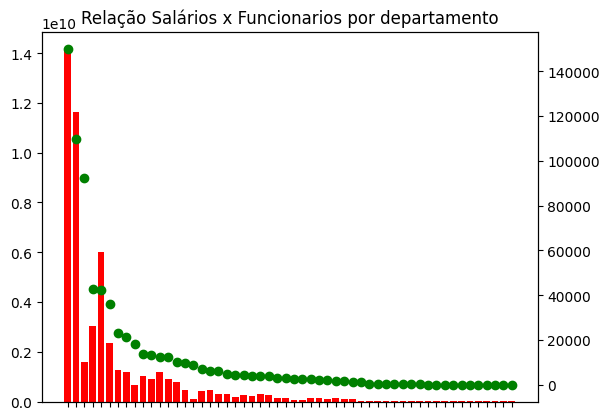

In [44]:
func_employee = data1.merge(data2)
func_employee["TOTAL_PAY"] = func_employee["TOTAL_PAY"].astype(float) 
fig = pyploy.subplot()
fig.bar(func_employee["DEPARTMENT_TITLE"],func_employee["TOTAL_PAY"], color = "r", label = "teste")
fig2 = fig.twinx()
fig2.scatter(func_employee["DEPARTMENT_TITLE"],func_employee["RECORD_NBR"], color = "g", label = "teste")
fig.set_xticklabels([])
fig2.xaxis.label.set_visible(False)
pyploy.title("Relação Salários x Funcionarios por departamento")
pyploy.show()

,DEPARTMENT_NO,DEPARTMENT_TITLE,RECORD_NBR,TOTAL_PAY
34,74,PUBLIC WORKS - BOARD OF PUBLIC WORKS,1332,83851407.10
35,48,LOS ANGELES DEPARTMENT OF CONVENTION AND TOURI...,1025,22925673.41
36,47,NEIGHBORHOOD EMPOWERMENT,479,21394643.94
37,35,EMERGENCY MANAGEMENT,427,28110253.48
38,33,EL PUEBLO DE LOS ANGELES HISTORICAL MONUMENT A...,409,11975648.00
39,17,CITY ETHICS COMMISSION,392,25918634.11
40,65,DISABILITY,260,18266654.52
41,13,CANNABIS REGULATION,181,9120277.39
42,21,COMMUNITY INVESTMENT FOR FAMILIES DEPARTMENT,138,4547191.37
43,36,EMPLOYEE RELATIONS BOARD,89,3049001.79


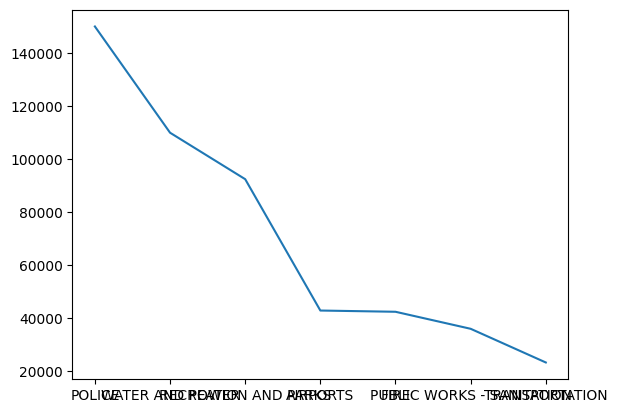

In [54]:
x = pyploy.subplot()
f1 = func_employee.head(7)
x.plot(f1["DEPARTMENT_TITLE"],f1["RECORD_NBR"])
func_employee.tail(20)

### Horas Extras

In [56]:
employees_departments = bd.groupby(["DEPARTMENT_NO","DEPARTMENT_TITLE"])["OVERTIME_PAY"].sum().reset_index()
data3 = employees_departments.sort_values(by="OVERTIME_PAY",ascending=False)

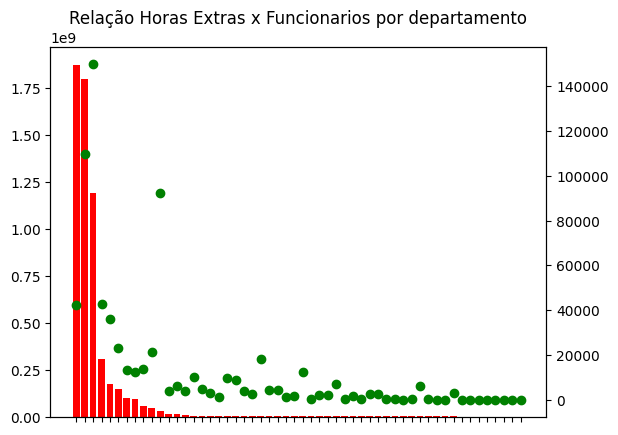

In [57]:
over_employees = data3.merge(data1)
fig = pyploy.subplot()
fig.bar(over_employees["DEPARTMENT_TITLE"],over_employees["OVERTIME_PAY"], color = "r", label = "teste")
fig2 = fig.twinx()
fig2.scatter(over_employees["DEPARTMENT_TITLE"],over_employees["RECORD_NBR"], color = "g", label = "teste")
fig.set_xticklabels([])
fig2.xaxis.label.set_visible(False)
pyploy.title("Relação Horas Extras x Funcionarios por departamento")
pyploy.show()

### Funcionários por ano

In [58]:
active = bd[bd["JOB_STATUS"] == "ACTIVE"]
employe_dep_year = active.groupby(["DEPARTMENT_NO","DEPARTMENT_TITLE","PAY_YEAR"]).size().reset_index(name="Empregados")
employe_dep_year.sort_values(by="Empregados", ascending=True)



,DEPARTMENT_NO,DEPARTMENT_TITLE,PAY_YEAR,Empregados
269,48,LOS ANGELES DEPARTMENT OF CONVENTION AND TOURI...,2013,1
270,48,LOS ANGELES DEPARTMENT OF CONVENTION AND TOURI...,2014,2
257,47,NEIGHBORHOOD EMPOWERMENT,2013,2
177,36,EMPLOYEE RELATIONS BOARD,2013,2
258,47,NEIGHBORHOOD EMPOWERMENT,2014,2
...,...,...,...,...
425,98,WATER AND POWER,2021,11704
323,70,POLICE,2019,11723
326,70,POLICE,2022,11964
325,70,POLICE,2021,12221


### Verificação se um departamento tem mais de um MOU

In [59]:
bd[bd["DEPARTMENT_NO"] == 70].value_counts("MOU")

MOU
24      62107
24.0    50267
03       8046
3.0      6510
18       3051
18.0     2526
01       2261
1.0      1632
20       1306
14       1091
12       1034
20.0     1029
14.0      886
21        870
12.0      837
25        832
08        766
21.0      700
25.0      683
8.0       654
00        464
0.0       431
28        251
02        204
2.0       183
36        163
28.0      146
36.0      138
17        128
17.0      112
19        103
37         96
37.0       95
19.0       93
10         80
10.0       69
04         56
4.0        37
13         14
13.0       10
64          8
39.0        7
64.0        6
09          6
15          6
39          5
9.0         4
15.0        4
Name: count, dtype: int64

Precisa tratar essa coluna para que os valores sejam padronizados

In [60]:
def convert(x):
    try:
        return int(x)
    except:
        return x
tratement = bd["MOU"]
tratement = tratement.apply(convert)
bd["MOU"] = tratement

In [61]:
bd[bd["MOU"] == 24].value_counts("MOU_TITLE")

MOU_TITLE
POLICE OFFICERS, LIEUTENANT AND BELOW    112374
Name: count, dtype: int64

### Tratamento coluna Ethnicity

In [62]:
ethnicians = bd["ETHNICITY"].unique()
print(ethnicians)

['HISPANIC' 'ASIAN AMERICAN' 'BLACK' 'CAUCASIAN' 'FILIPINO'
 'NOT APPLICABLE' 'AMERICAN INDIAN/ALASKAN NATIVE' 'ASIAN' 'OTHER'
 'AMERICAN INDIAN' 'UNKNOWN' 'TWO OR MORE RACES' 'PACIFIC ISLANDER' nan
 'FILLIPINO' 'NATIVE_AMERICAN']


In [63]:
bd["ETHNICITY"].value_counts()

ETHNICITY
HISPANIC                          263490
CAUCASIAN                         180719
BLACK                             112328
ASIAN                              59126
FILIPINO                           27834
OTHER                              22167
ASIAN AMERICAN                      8830
FILLIPINO                           1630
AMERICAN INDIAN                     1448
NOT APPLICABLE                      1270
UNKNOWN                             1009
TWO OR MORE RACES                    715
AMERICAN INDIAN/ALASKAN NATIVE       452
NATIVE_AMERICAN                      187
PACIFIC ISLANDER                      44
Name: count, dtype: int64

In [64]:
all_employees = list(bd["RECORD_NBR"].unique())
for employee in all_employees:
    modify_eth = bd[bd["RECORD_NBR"] == employee]
    eth = modify_eth["ETHNICITY"].nunique()
    if eth != 1:
            print(modify_eth["ETHNICITY"])

1         ASIAN AMERICAN
11541     ASIAN AMERICAN
237916             ASIAN
246368             ASIAN
257394             ASIAN
394480    ASIAN AMERICAN
589888    ASIAN AMERICAN
Name: ETHNICITY, dtype: object
3         ASIAN AMERICAN
11543     ASIAN AMERICAN
237918             ASIAN
246370             ASIAN
257396             ASIAN
394482    ASIAN AMERICAN
589890    ASIAN AMERICAN
Name: ETHNICITY, dtype: object
12         FILIPINO
11552      FILIPINO
237926    FILLIPINO
246378    FILLIPINO
257405    FILLIPINO
Name: ETHNICITY, dtype: object
18        ASIAN AMERICAN
11557     ASIAN AMERICAN
237930             ASIAN
246382             ASIAN
257409             ASIAN
275845             ASIAN
394495    ASIAN AMERICAN
589903    ASIAN AMERICAN
Name: ETHNICITY, dtype: object
28        ASIAN AMERICAN
11567     ASIAN AMERICAN
237939             ASIAN
246391             ASIAN
257419             ASIAN
275892             ASIAN
394506    ASIAN AMERICAN
589914    ASIAN AMERICAN
Name: ETHNICITY, dtype: ob

KeyboardInterrupt: 

In [ ]:
departments_free = list(payments_departments[payments_departments["TOTAL_PAY"] <= 100]["DEPARTMENT_NO"])
for department in departments_free:
    listas = bd[bd["DEPARTMENT_NO"] == department]
    print(listas)